Joukowski Transformation

In [1462]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

1. Complex numbers in Python

Exercises 1

In [1463]:
a = 2.75
b=3.69
c=8.55
d=6.13

In [1464]:
e=(a+b*1j)*(c-d*1j)
print(e)
print(type(e))

(46.1322+14.692000000000004j)
<class 'complex'>


Exercises 2

In [1465]:
f=1j*5.32
g=1.4*numpy.exp(f)
print(g)

(0.799270785858-1.1494199454j)


Exercises 3

In [1466]:
h=(7.51-9.15*1j)/(4.43+9.64*1j)
print(h)

(-0.4880897698448308-1.0033441577191493j)


2  Shapes created by the Joukowski transformation

Question 1

In [1467]:
N = 50                                # number of points in each direction
x_start, x_end = -5.0, 5.0            # boundaries in the x-direction
y_start, y_end = -5.0, 5.0           # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

X, Y = numpy.meshgrid(x, y)  

In [1468]:
r=1.5
c1=1
a1,b1=0,0

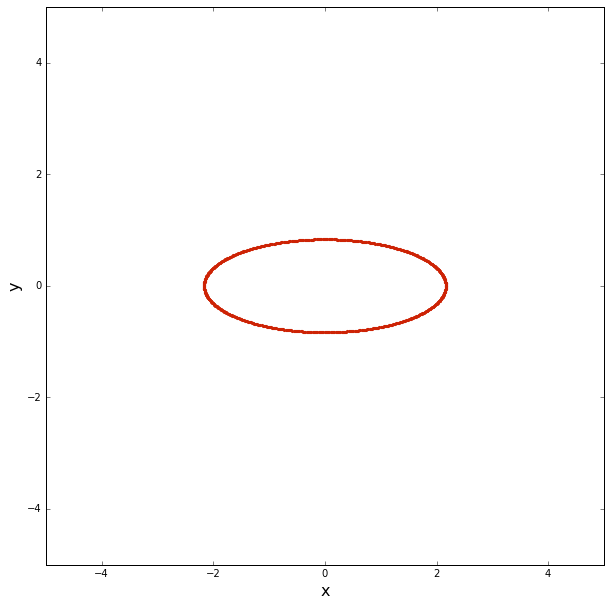

In [1469]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x1 = a1+r * numpy.cos(theta)
y1 = b1+r * numpy.sin(theta)

z=x1+y1*1j
ep=z+c1**2/z
   

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep.real,ep.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 2

In [1470]:
r1=1.2
c1=1
a2,b2=c1-r1,0

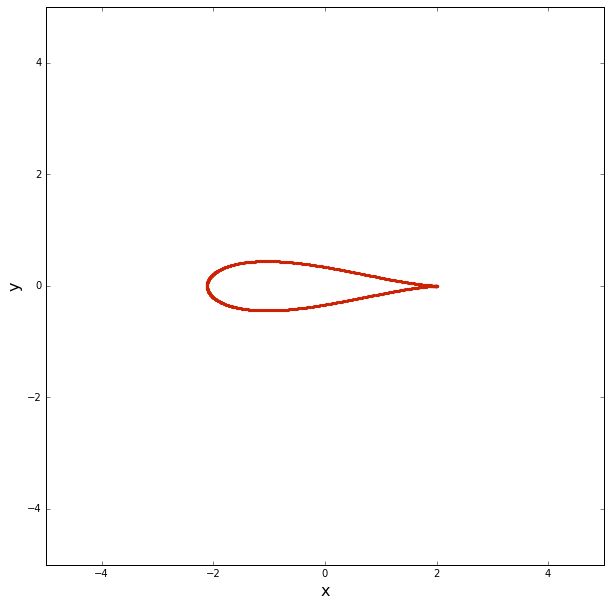

In [1471]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x2 = a2+r1 * numpy.cos(theta)
y2 = b2+r1 * numpy.sin(theta)

z1=x2+y2*1j
ep1=z1+c1**2/z1
   

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep1.real,ep1.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 3

In [1472]:
c1=1
a3,b3=-0.1,0.1
r2=math.sqrt((c1-0.1)**2+0.1**2)

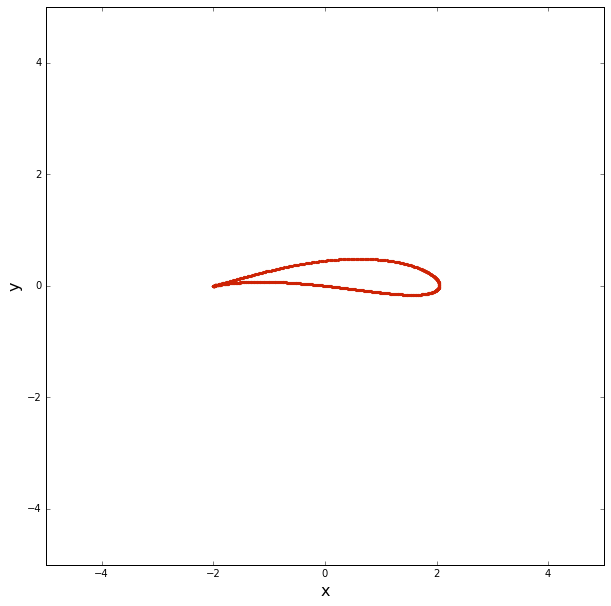

In [1473]:
theta = numpy.arange(0, 2*numpy.pi, 0.01)
x3 = a3+r2 * numpy.cos(theta)
y3 = b3+r2 * numpy.sin(theta)

z2=x3+y3*1j
ep2=z2+c1**2/z2
   
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(ep2.real,ep2.imag, s=10, color='#CD2305', marker='o', linewidth=0)


Question 4

3 Grid points on the zz-plane using polar coordinates

Exercises:

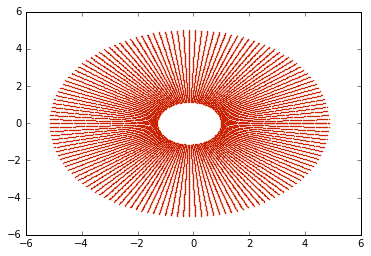

In [1474]:
C=1.0
R = 1.15
A,B=-0.15,0
r5 = numpy.linspace(R,5,100)
theta5 = numpy.linspace(0,2*numpy.pi,145)
radius_matrix,theta_matrix = numpy.meshgrid(r5,theta5)
X1 = A+radius_matrix * numpy.cos(theta_matrix)
Y1 = B+radius_matrix * numpy.sin(theta_matrix)


pyplot.scatter(X1,Y1,s=2, color='#CD2305', marker='o', linewidth=0)

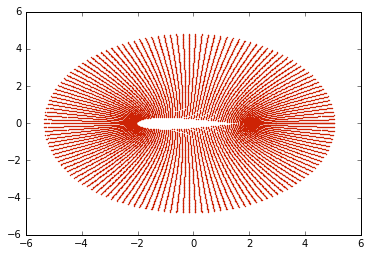

In [1475]:
zz=X1+Y1*1j
ebx=zz+C/zz

pyplot.scatter(ebx.real,ebx.imag,s=2, color='#CD2305', marker='o', linewidth=0)

4 Flow over a symmetric Joukowski airfoil with zero angle of attack

In [1476]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
   
    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [1477]:
u_inf = 1.0 
kappa =2 * numpy.pi * u_inf * R**2 #R= math.sqrt(kappa/(2*math.pi*u_inf)) so, kappa=8.30

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, A, B, X1, Y1)

In [1478]:
# compute the stream-function
psi_freestream = u_inf * Y1

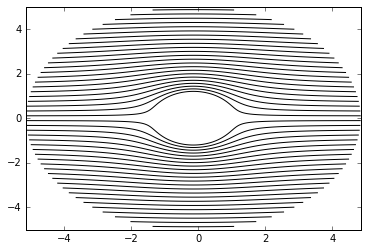

In [1479]:
psi = psi_freestream + psi_doublet

#pyplot.streamplot(X1, Y1, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.contour(X1, Y1, psi,levels = numpy.linspace(-5,5,50), colors='black',linestyles='solid')

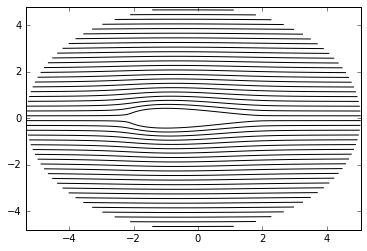

In [1480]:
pyplot.contour(ebx.real, ebx.imag, psi,levels = numpy.linspace(-5,5,50), colors='black', linestyles='solid')

In [1481]:
def get_velocity_doublet(strength, xd, yd, X, Y):
   
    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

In [1482]:
u_doublet, v_doublet = get_velocity_doublet(kappa, A, B, X1, Y1)
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)

u = u_freestream + u_doublet
v = v_freestream + v_doublet

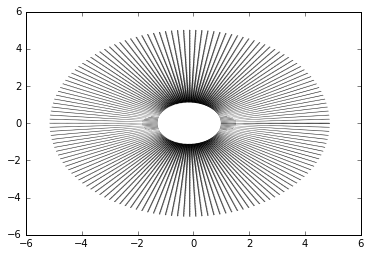

In [1483]:
pyplot.quiver(X1,Y1,u,v)

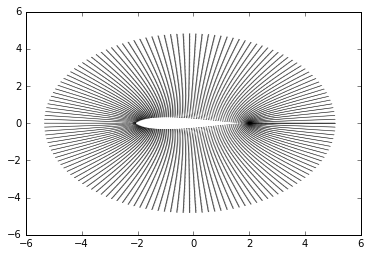

In [1484]:
W=(u-v*1j)/(1-(C/zz)**2)
pyplot.quiver(ebx.real,ebx.imag,W.real,W.imag)

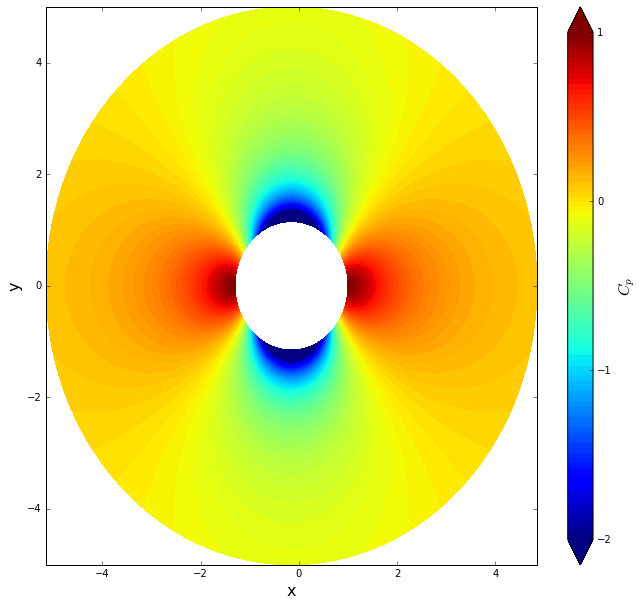

In [1485]:
cp = 1.0 - (u**2+v**2/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(X1, Y1, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

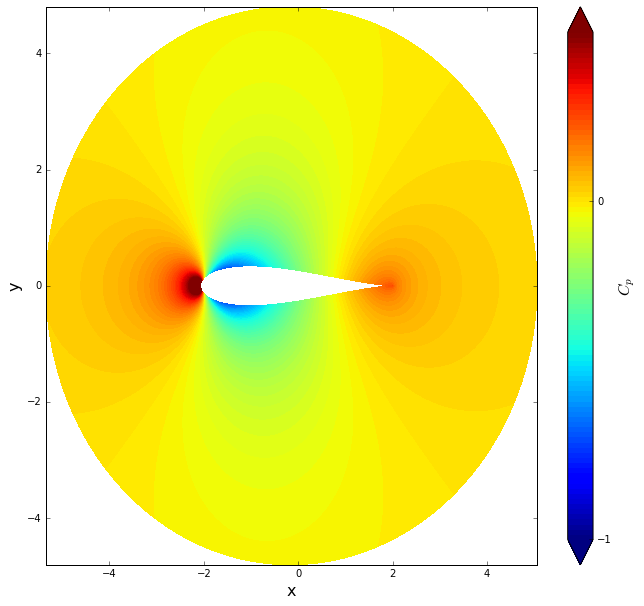

In [1486]:
cp_ebx=1.0-((W.real**2+W.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-1.0, 0.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [1487]:
W[61][0]

(1.1063384662852436-0.52363334929849692j)

In [1488]:
kappa

8.309512568745001

In [1489]:
numpy.min(cp_ebx)

-0.68775567409240423

5 Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

I was trying different way to get the anwsers but failed even the images were similar, however, the interesting thing was I can get some correct numbers after I checked these in openedx in serveral times, honestly, I dont know how its right... so, I think I am stuck.

In [1490]:
radius = 1.15
r = numpy.linspace(radius, 5,100)
theta = numpy.linspace(0, 2*numpy.pi,145)
R, Theta = numpy.meshgrid(r,theta)

c = 1
A = 0.15
B = 0.0

e = -1*A + 1j*B
aoa=20/180*numpy.pi
angle = numpy.exp(-1j*aoa)
zz = R*numpy.exp(Theta*1j)
z11 = (zz+e) * angle 

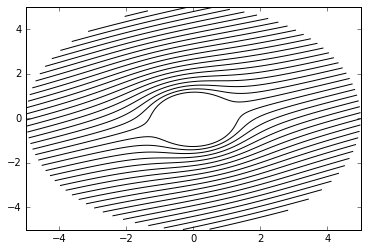

In [1491]:
psi_doublet1 = get_stream_function_doublet(kappa, -A, B, z11.real, z11.imag)
u_inf = 1.0        # freestream speed

# compute the stream-function
psi_freestream = u_inf * z11.imag
psi = psi_freestream + psi_doublet1

#pyplot.streamplot(X1, Y1, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.contour(zz.real, zz.imag, psi,levels = numpy.linspace(-6,6,50), colors='black',linestyles='solid')

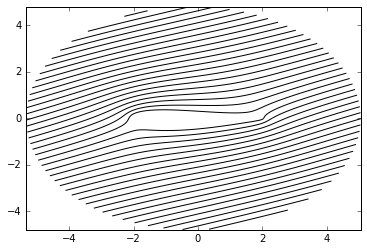

In [1492]:
pyplot.contour(ebx.real, ebx.imag, psi,levels = numpy.linspace(-6,6,50), colors='black',linestyles='solid')

In [1493]:
u_doublet, v_doublet = get_velocity_doublet(kappa, -A, B, z11.real, z11.imag)

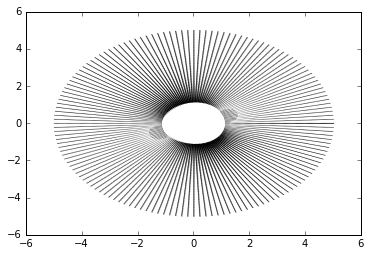

In [1494]:
u_freestream = u_inf * numpy.ones((145, 100), dtype=float)
v_freestream = numpy.zeros((145, 100), dtype=float)
u = u_freestream + u_doublet
v = v_freestream + v_doublet

U = (u-1j*v)*angle
pyplot.quiver(zz.real, zz.imag, U.real, U.imag)

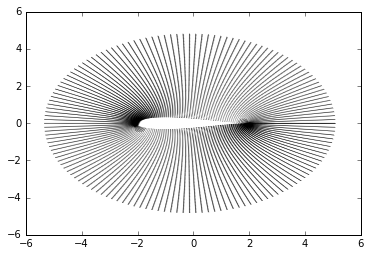

In [1495]:
W1 = U/(1-(c/zz)**2)
pyplot.quiver(ebx.real,ebx.imag,W1.real,W1.imag)

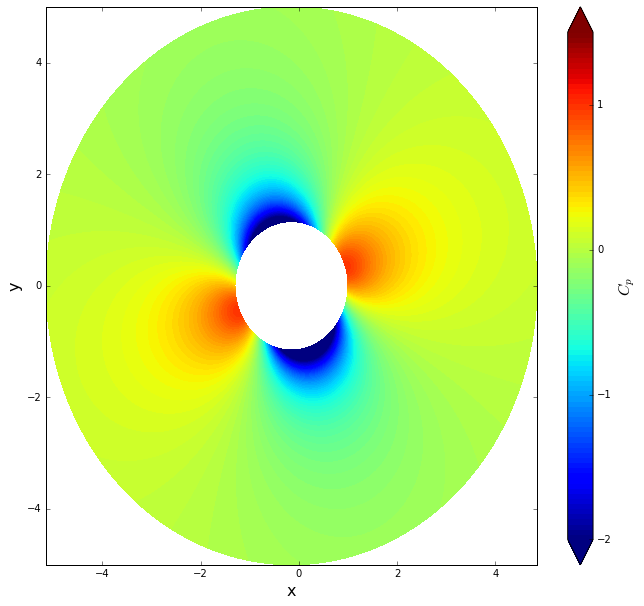

In [1496]:
cp = 1.0 - (U.real**2+U.imag**2)/u_inf**2

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(X1, Y1, cp, levels=numpy.linspace(-2.0, 1.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

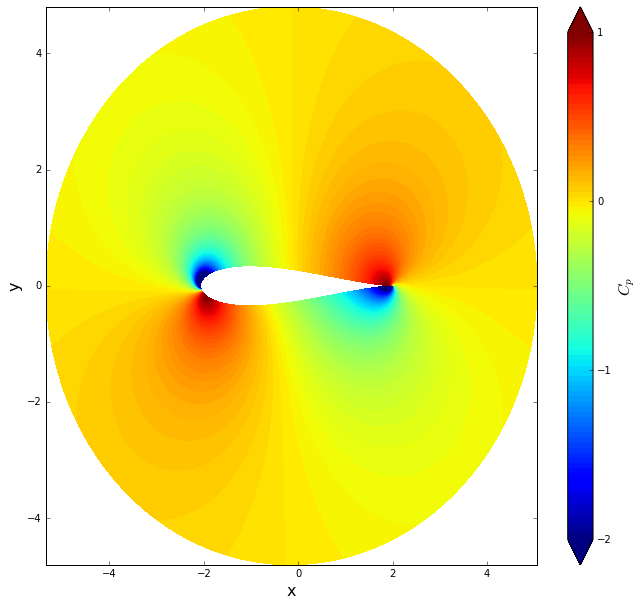

In [1497]:
cp_ebx=1.0-((W1.real**2+W1.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [1498]:
W11=(W1.real**2+W1.imag**2)**0.5
numpy.where(W11==numpy.min(W11))

(array([7]), array([0]))

In [1499]:
numpy.where(W11==numpy.max(W11))

(array([71]), array([0]))

In [1500]:
W1.real[49][0]

1.263332173303827

In [1501]:
W1.imag[49][0]

-0.079944250320199306

In [1502]:
cp_ebx[74][0]

-3.3808007604289649

In [1503]:
numpy.where(cp_ebx==numpy.max(cp_ebx))

(array([7]), array([0]))

6 Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [1504]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):

    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [1505]:
gamma = 4*numpy.pi*u_inf*(radius)*numpy.sin(aoa)     

In [1506]:
gamma

4.9426446603975842

In [1507]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, -A, B, z11.real, z11.imag)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, -A, B, z11.real, z11.imag)

In [1508]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet1 + psi_vortex

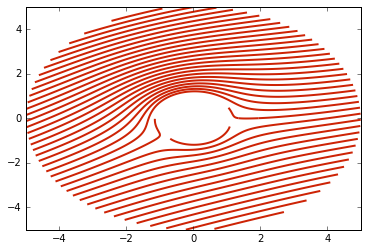

In [1509]:
pyplot.contour(zz.real, zz.imag, psi, levels = numpy.linspace(-6,6,50), colors='#CD2305', linewidths=2, linestyles='solid')

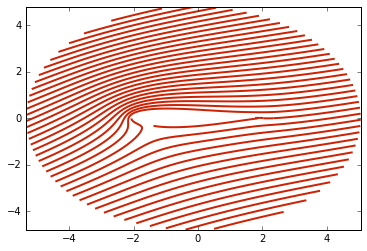

In [1510]:
pyplot.contour(ebx.real, ebx.imag, psi, levels = numpy.linspace(-6,6,50), colors='#CD2305', linewidths=2, linestyles='solid')

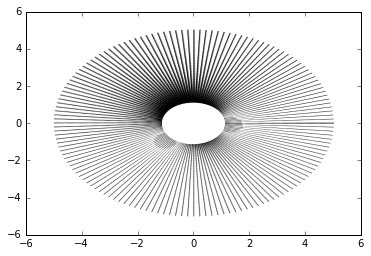

In [1511]:
U1 = (u-1j*v)*angle

pyplot.quiver(zz.real, zz.imag, U1.real, -U1.imag)

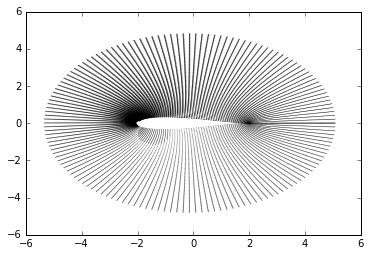

In [1512]:
w = (U1.real+1j*U1.imag)/(1-(c/zz)**2)
pyplot.quiver(ebx.real, ebx.imag, w.real, -w.imag)

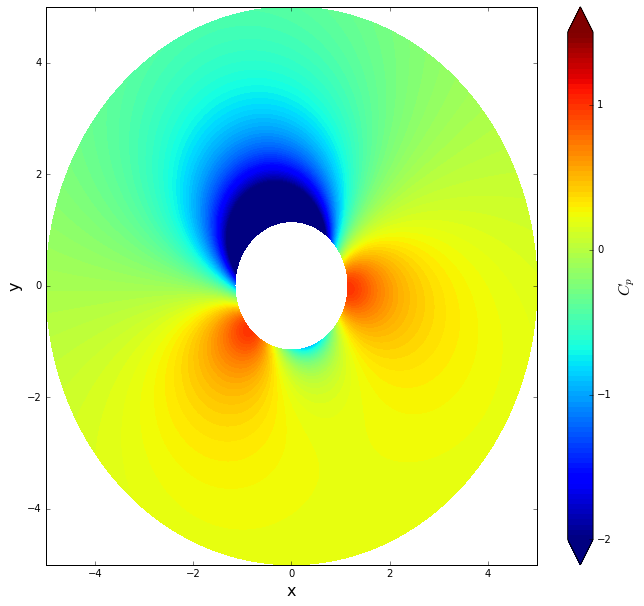

In [1513]:
cp = 1.0 - (U1.real**2+U1.imag**2)/u_inf**2

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(zz.real, zz.imag, cp, levels=numpy.linspace(-2.0, 1.5, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

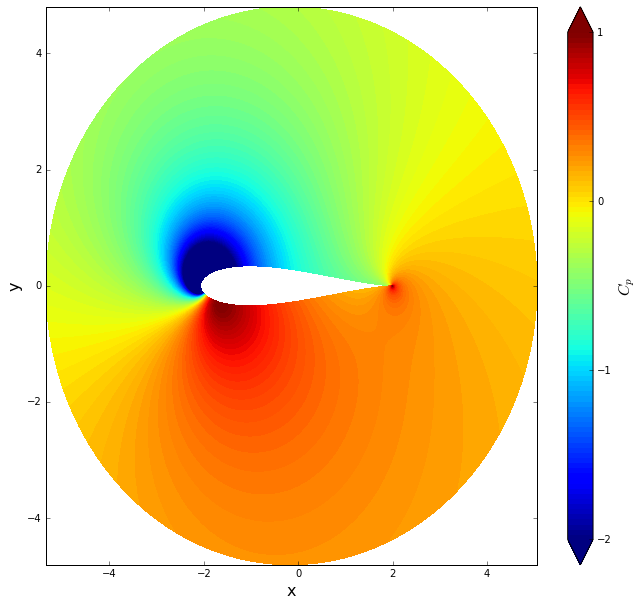

In [1514]:
cp_ebx=1.0-((w.real**2+w.imag**2)/u_inf**2)

pyplot.figure(figsize=(1.1*size,size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
contf = pyplot.contourf(ebx.real, ebx.imag, cp_ebx, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

In [1525]:
w11=(w.real**2+w.imag**2)**0.5
numpy.where(w11==numpy.min(w11))

(array([89]), array([1]))

In [1526]:
w[91][0]

(0.12856406338230902+0.060552229998206739j)

In [1516]:
cp_ebx[110][0]

0.44201615854885401

In [1519]:
density = 1.225 #kg/m3

In [1521]:
L = density * gamma * u_inf
print (L)

6.05473970899
